In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Model vs Model

In [2]:
#load the data
with open('data/vicuna_metrics.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
print(data.keys())

dict_keys(['answer_vicuna-7B_summarisation_arxiv_0.65.pkl', 'answer_vicuna-7B_reconstruction_news_0.5.pkl', 'answer_vicuna-13B_summarisation_arxiv_0.8.pkl', 'answer_vicuna-7B_qa_news_0.35.pkl', 'answer_vicuna-13B_reconstruction_news_0.35.pkl', 'answer_vicuna-7B_reconstruction_arxiv_0.5.pkl', 'answer_vicuna-13B_reconstruction_arxiv_0.2.pkl', 'answer_vicuna-7B_reconstruction_arxiv_0.65.pkl', 'answer_vicuna-7B_qa_news_0.2.pkl', 'answer_vicuna-7B_qa_arxiv_0.2.pkl', 'answer_vicuna-13B_summarisation_news_0.5.pkl', 'answer_vicuna-13B_qa_arxiv_0.35.pkl', 'answer_vicuna-13B_summarisation_arxiv_0.35.pkl', 'answer_vicuna-7B_summarisation_news_0.35.pkl', 'answer_vicuna-13B_reconstruction_news_0.5.pkl', 'answer_vicuna-7B_qa_news_0.5.pkl', 'answer_vicuna-7B_reconstruction_news_0.2.pkl', 'answer_vicuna-13B_reconstruction_arxiv_0.5.pkl', 'answer_vicuna-13B_qa_news_0.8.pkl', 'answer_vicuna-7B_summarisation_news_0.2.pkl', 'answer_vicuna-13B_qa_arxiv_0.2.pkl', 'answer_vicuna-7B_qa_arxiv_0.35.pkl', 'answe

In [5]:
# load the news data vicuna_7B
vicuna_7B = {}

for key, value in data.items():
    if key.startswith('answer_vicuna-7B'):
        vicuna_7B[key] = value

In [6]:
vicuna_7B.keys()

dict_keys(['answer_vicuna-7B_summarisation_arxiv_0.65.pkl', 'answer_vicuna-7B_reconstruction_news_0.5.pkl', 'answer_vicuna-7B_qa_news_0.35.pkl', 'answer_vicuna-7B_reconstruction_arxiv_0.5.pkl', 'answer_vicuna-7B_reconstruction_arxiv_0.65.pkl', 'answer_vicuna-7B_qa_news_0.2.pkl', 'answer_vicuna-7B_qa_arxiv_0.2.pkl', 'answer_vicuna-7B_summarisation_news_0.35.pkl', 'answer_vicuna-7B_qa_news_0.5.pkl', 'answer_vicuna-7B_reconstruction_news_0.2.pkl', 'answer_vicuna-7B_summarisation_news_0.2.pkl', 'answer_vicuna-7B_qa_arxiv_0.35.pkl', 'answer_vicuna-7B_summarisation_arxiv_0.2.pkl', 'answer_vicuna-7B_summarisation_news_0.5.pkl', 'answer_vicuna-7B_summarisation_arxiv_0.35.pkl', 'answer_vicuna-7B_summarisation_news_0.8.pkl', 'answer_vicuna-7B_reconstruction_arxiv_0.2.pkl', 'answer_vicuna-7B_summarisation_arxiv_0.8.pkl', 'answer_vicuna-7B_reconstruction_arxiv_0.8.pkl', 'answer_vicuna-7B_qa_news_0.65.pkl', 'answer_vicuna-7B_qa_news_0.8.pkl', 'answer_vicuna-7B_reconstruction_news_0.8.pkl', 'answer_

In [7]:
vicuna_7B['answer_vicuna-7B_reconstruction_news_0.5.pkl']['self-info-phrase'].keys()

dict_keys(['bleu', 'precisions', 'brevity_penalty', 'length_ratio', 'translation_length', 'reference_length', 'meteor', 'rouge1', 'rouge2', 'rougeL', 'rougeLsum', 'bertscore_precision', 'bertscore_recall', 'bertscore_f1'])

## 1.bleu

In [44]:
# load the values of bleu
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
vicuna_7B_bleu_values = {reduction: [] for reduction in reduction_values}
vicuna_13B_bleu_values = {reduction: [] for reduction in reduction_values}
vicuna_7B_bleu_values

{0.2: [], 0.35: [], 0.5: [], 0.65: [], 0.8: []}

In [45]:
for key in data.keys():
    if 'vicuna-7B' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                vicuna_7B_bleu_values[reduction].append(data[key]['self-info-phrase']['bleu'])
    elif 'vicuna-13B' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                vicuna_13B_bleu_values[reduction].append(data[key]['self-info-phrase']['bleu'])
vicuna_7B_bleu_values

{0.2: [0.6803490258594289,
  0.6367160656269641,
  0.5344475951113588,
  0.3238320661401498,
  0.39300186234259593,
  0.5363006794059053],
 0.35: [0.5762027172577416,
  0.27012192327302154,
  0.5594925308719025,
  0.31459615814608444,
  0.4584889336875391,
  0.4389208668400113],
 0.5: [0.338889857921479,
  0.36788000846799745,
  0.49252054823407454,
  0.22169585746903428,
  0.22298641533650118,
  0.4879472803635215],
 0.65: [0.14657801065989928,
  0.22413290613128736,
  0.4218775047419549,
  0.18411613259929416,
  0.4244104419614452,
  0.15648880444031432],
 0.8: [0.0796910813027953,
  0.08294782621290801,
  0.06987563696817854,
  0.38018983515490795,
  0.05791236596841879,
  0.3919659310810072]}

In [46]:
# calculate the avarage bleu
vicuna_7B_bleu_values = [np.mean(vicuna_7B_bleu_values[reduction]) for reduction in reduction_values]
vicuna_13B_bleu_values = [np.mean(vicuna_13B_bleu_values[reduction]) for reduction in reduction_values]
vicuna_7B_bleu_values,vicuna_13B_bleu_values

([0.5174412157477338,
  0.4363038550127168,
  0.3553199946321013,
  0.2596006334223659,
  0.1770971127813693],
 [0.5223942570656941,
  0.43620353801830025,
  0.3558134383663501,
  0.2541117552627433,
  0.16807848241049725])

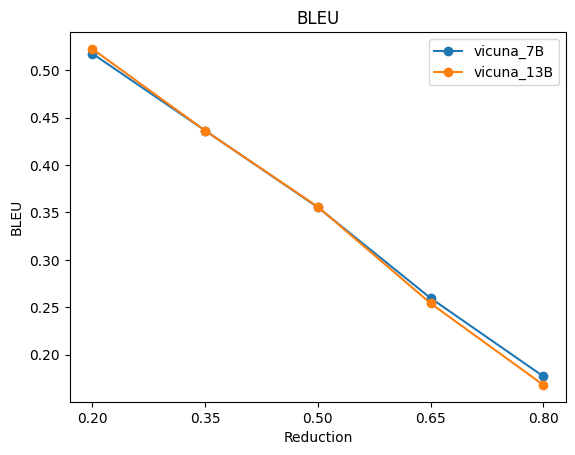

In [47]:
# Plot results
plt.plot(reduction_values, vicuna_7B_bleu_values, 'o-', label='vicuna_7B')
plt.plot(reduction_values, vicuna_13B_bleu_values, 'o-', label='vicuna_13B')

#Add data point
# for x, y in zip(reduction_values, vicuna_7B_bleu_values):
#     plt.annotate("", xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
#     plt.annotate("", xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
# for x, y in zip(reduction, arxiv_average_bleu):
#     plt.text(x, y, f'{y:.3f}', ha='right', va='bottom')
# for x, y in zip(reduction, news_average_bleu):
#     plt.text(x, y, f'{y:.3f}', ha='left', va='top')

plt.title('BLEU')
plt.xlabel('Reduction')
plt.ylabel('BLEU')

plt.xticks(reduction_values)

plt.legend()
plt.show()


## 2. meteor

In [20]:
# load the values of bleu
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
vicuna_7B_meteor_values = {reduction: [] for reduction in reduction_values}
vicuna_13B_meteor_values = {reduction: [] for reduction in reduction_values}
vicuna_7B_meteor_values

{0.2: [], 0.35: [], 0.5: [], 0.65: [], 0.8: []}

In [21]:
for key in data.keys():
    if 'vicuna-7B' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                vicuna_7B_meteor_values[reduction].append(data[key]['self-info-phrase']['meteor'])
    elif 'vicuna-13B' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                vicuna_13B_meteor_values[reduction].append(data[key]['self-info-phrase']['meteor'])
vicuna_7B_meteor_values

{0.2: [0.7644875711491482,
  0.7122673371514643,
  0.6759475149973305,
  0.5515965189413804,
  0.5441324577159331,
  0.6049844353245513],
 0.35: [0.697095057056299,
  0.5167825383583702,
  0.6587315899671589,
  0.49437116464346287,
  0.5561517673560694,
  0.609160823795146],
 0.5: [0.5207793765738441,
  0.4743578480995502,
  0.6188941869759844,
  0.456956712929749,
  0.4323123221341846,
  0.6108012644663582],
 0.65: [0.3594701035586167,
  0.36425964782095327,
  0.5645247459307583,
  0.38852761748102,
  0.5524928199810845,
  0.3697885226894036],
 0.8: [0.2813521491074687,
  0.274898470674864,
  0.21952331192698632,
  0.5249780226874542,
  0.24427229263609018,
  0.5158442080612989]}

In [24]:
# calculate the avarage meteor
vicuna_7B_meteor_values = [np.mean(vicuna_7B_meteor_values[reduction]) for reduction in reduction_values]
vicuna_13B_meteor_values = [np.mean(vicuna_13B_meteor_values[reduction]) for reduction in reduction_values]
vicuna_7B_meteor_values,vicuna_13B_meteor_values

([0.6422359725466347,
  0.5887154901960844,
  0.5190169518632785,
  0.433177242910306,
  0.343478075849027],
 [0.6498656244686298,
  0.5873910320823342,
  0.5179638636650578,
  0.42850316371481284,
  0.3398491886151087])

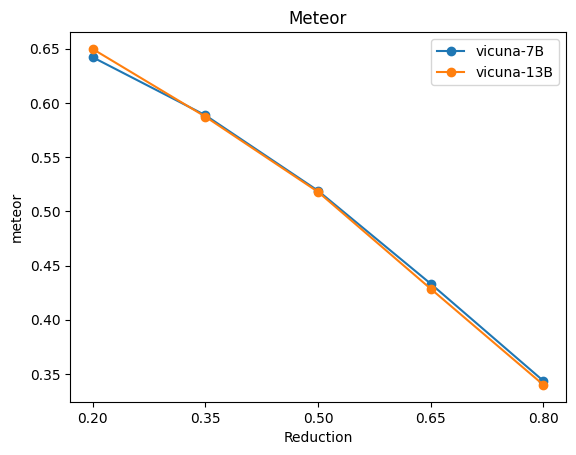

In [25]:
# Plot results
plt.plot(reduction_values, vicuna_7B_meteor_values, 'o-', label='vicuna-7B')
plt.plot(reduction_values, vicuna_13B_meteor_values, 'o-', label='vicuna-13B')


plt.title('Meteor')
plt.xlabel('Reduction')
plt.ylabel('meteor')

plt.xticks(reduction_values)

plt.legend()
plt.show()

## 3.Rouge1

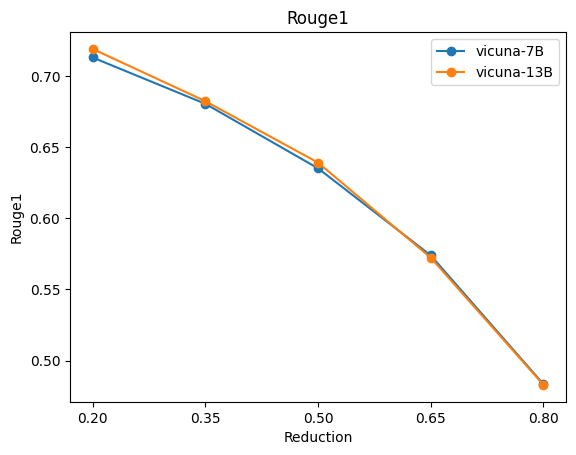

In [36]:
# load the values of rouge1
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
vicuna_7B_rouge1_values = {reduction: [] for reduction in reduction_values}
vicuna_13B_rouge1_values = {reduction: [] for reduction in reduction_values}

for key in data.keys():
    if 'vicuna-7B' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                vicuna_7B_rouge1_values[reduction].append(data[key]['self-info-phrase']['rouge1'])
    elif 'vicuna-13B' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                vicuna_13B_rouge1_values[reduction].append(data[key]['self-info-phrase']['rouge1'])


# calculate the avarage rouge1
vicuna_7B_average_rouge1 = [np.mean(vicuna_7B_rouge1_values[reduction]) for reduction in reduction_values]
vicuna_13B_average_rouge1= [np.mean(vicuna_13B_rouge1_values[reduction]) for reduction in reduction_values]


# Plot results
plt.plot(reduction_values, vicuna_7B_average_rouge1, 'o-', label='vicuna-7B')
plt.plot(reduction_values, vicuna_13B_average_rouge1, 'o-', label='vicuna-13B')


plt.title('Rouge1')
plt.xlabel('Reduction')
plt.ylabel('Rouge1')

plt.xticks(reduction_values)

plt.legend()
plt.show()

## 4. Rouge2

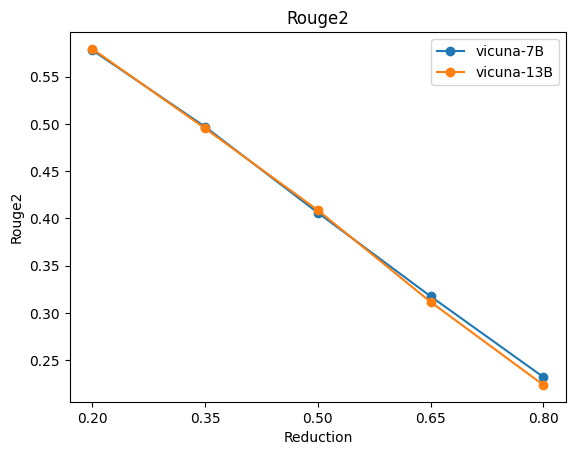

In [37]:
# load the values of rouge2
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
vicuna_7B_rouge2_values = {reduction: [] for reduction in reduction_values}
vicuna_13B_rouge2_values = {reduction: [] for reduction in reduction_values}

for key in data.keys():
    if 'vicuna-7B' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                vicuna_7B_rouge2_values[reduction].append(data[key]['self-info-phrase']['rouge2'])
    elif 'vicuna-13B' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                vicuna_13B_rouge2_values[reduction].append(data[key]['self-info-phrase']['rouge2'])


# calculate the avarage rouge2
vicuna_7B_average_rouge2 = [np.mean(vicuna_7B_rouge2_values[reduction]) for reduction in reduction_values]
vicuna_13B_average_rouge2= [np.mean(vicuna_13B_rouge2_values[reduction]) for reduction in reduction_values]


# Plot results
plt.plot(reduction_values, vicuna_7B_average_rouge2, 'o-', label='vicuna-7B')
plt.plot(reduction_values, vicuna_13B_average_rouge2, 'o-', label='vicuna-13B')


plt.title('Rouge2')
plt.xlabel('Reduction')
plt.ylabel('Rouge2')

plt.xticks(reduction_values)

plt.legend()
plt.show()

## 5 RougeL

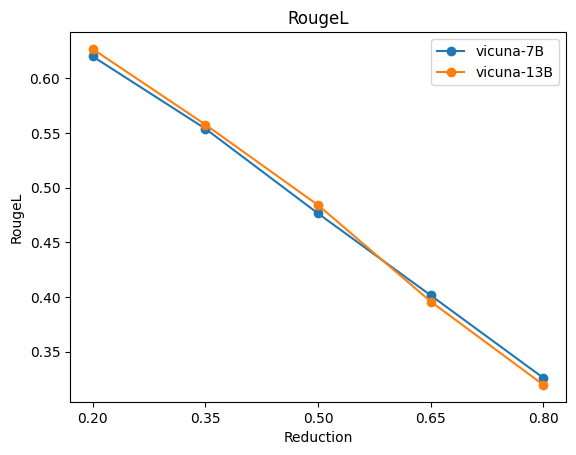

In [39]:
# load the values of rougeL
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
vicuna_7B_rougeL_values = {reduction: [] for reduction in reduction_values}
vicuna_13B_rougeL_values = {reduction: [] for reduction in reduction_values}

for key in data.keys():
    if 'vicuna-7B' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                vicuna_7B_rougeL_values[reduction].append(data[key]['self-info-phrase']['rougeL'])
    elif 'vicuna-13B' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                vicuna_13B_rougeL_values[reduction].append(data[key]['self-info-phrase']['rougeL'])


# calculate the avarage rougeL
vicuna_7B_average_rougeL = [np.mean(vicuna_7B_rougeL_values[reduction]) for reduction in reduction_values]
vicuna_13B_average_rougeL= [np.mean(vicuna_13B_rougeL_values[reduction]) for reduction in reduction_values]


# Plot results
plt.plot(reduction_values, vicuna_7B_average_rougeL, 'o-', label='vicuna-7B')
plt.plot(reduction_values, vicuna_13B_average_rougeL, 'o-', label='vicuna-13B')


plt.title('RougeL')
plt.xlabel('Reduction')
plt.ylabel('RougeL')

plt.xticks(reduction_values)

plt.legend()
plt.show()

## 6.bertscore_precision

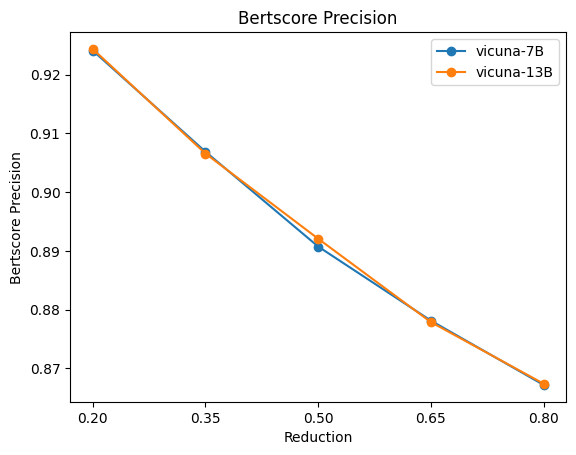

In [40]:
# load the values of bertscore_precision
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
vicuna_7B_bertscore_precision_values = {reduction: [] for reduction in reduction_values}
vicuna_13B_bertscore_precision_values = {reduction: [] for reduction in reduction_values}

for key in data.keys():
    if 'vicuna-7B' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                vicuna_7B_bertscore_precision_values[reduction].append(data[key]['self-info-phrase']['bertscore_precision'])
    elif 'vicuna-13B' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                vicuna_13B_bertscore_precision_values[reduction].append(data[key]['self-info-phrase']['bertscore_precision'])


# calculate the avarage bertscore_precision
vicuna_7B_average_bertscore_precision = [np.mean(vicuna_7B_bertscore_precision_values[reduction]) for reduction in reduction_values]
vicuna_13B_average_bertscore_precision= [np.mean(vicuna_13B_bertscore_precision_values[reduction]) for reduction in reduction_values]


# Plot results
plt.plot(reduction_values, vicuna_7B_average_bertscore_precision, 'o-', label='vicuna-7B')
plt.plot(reduction_values, vicuna_13B_average_bertscore_precision, 'o-', label='vicuna-13B')


plt.title('Bertscore Precision')
plt.xlabel('Reduction')
plt.ylabel('Bertscore Precision')

plt.xticks(reduction_values)

plt.legend()
plt.show()

## 7. bertscore_recall

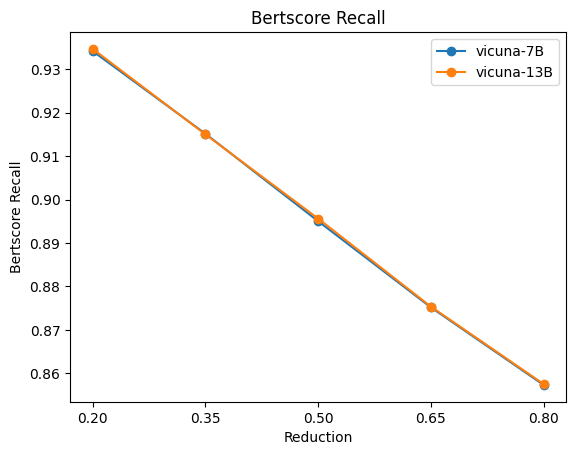

In [41]:
# load the values of bertscore_recall
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
vicuna_7B_bertscore_recall_values = {reduction: [] for reduction in reduction_values}
vicuna_13B_bertscore_recall_values = {reduction: [] for reduction in reduction_values}

for key in data.keys():
    if 'vicuna-7B' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                vicuna_7B_bertscore_recall_values[reduction].append(data[key]['self-info-phrase']['bertscore_recall'])
    elif 'vicuna-13B' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                vicuna_13B_bertscore_recall_values[reduction].append(data[key]['self-info-phrase']['bertscore_recall'])


# calculate the avarage bertscore_recall
vicuna_7B_average_bertscore_recall = [np.mean(vicuna_7B_bertscore_recall_values[reduction]) for reduction in reduction_values]
vicuna_13B_average_bertscore_recall= [np.mean(vicuna_13B_bertscore_recall_values[reduction]) for reduction in reduction_values]


# Plot results
plt.plot(reduction_values, vicuna_7B_average_bertscore_recall, 'o-', label='vicuna-7B')
plt.plot(reduction_values, vicuna_13B_average_bertscore_recall, 'o-', label='vicuna-13B')


plt.title('Bertscore Recall')
plt.xlabel('Reduction')
plt.ylabel('Bertscore Recall')

plt.xticks(reduction_values)

plt.legend()
plt.show()

## 8. bestscore_f1

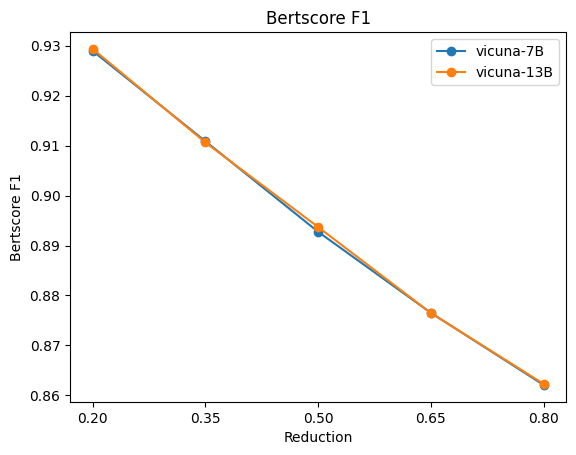

In [42]:
# load the values of bertscore_f1
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
vicuna_7B_bertscore_f1_values = {reduction: [] for reduction in reduction_values}
vicuna_13B_bertscore_f1_values = {reduction: [] for reduction in reduction_values}

for key in data.keys():
    if 'vicuna-7B' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                vicuna_7B_bertscore_f1_values[reduction].append(data[key]['self-info-phrase']['bertscore_f1'])
    elif 'vicuna-13B' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                vicuna_13B_bertscore_f1_values[reduction].append(data[key]['self-info-phrase']['bertscore_f1'])


# calculate the avarage bertscore_f1
vicuna_7B_average_bertscore_f1 = [np.mean(vicuna_7B_bertscore_f1_values[reduction]) for reduction in reduction_values]
vicuna_13B_average_bertscore_f1= [np.mean(vicuna_13B_bertscore_f1_values[reduction]) for reduction in reduction_values]


# Plot results
plt.plot(reduction_values, vicuna_7B_average_bertscore_f1, 'o-', label='vicuna-7B')
plt.plot(reduction_values, vicuna_13B_average_bertscore_f1, 'o-', label='vicuna-13B')


plt.title('Bertscore F1')
plt.xlabel('Reduction')
plt.ylabel('Bertscore F1')

plt.xticks(reduction_values)

plt.legend()
plt.show()